In [123]:
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('PM10_seoul.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    192 non-null    object 
 1   PM-10   192 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.2+ KB


(1) 시간에 따른 미세먼지 농도를 적절한 그래프로 시각화하세요. 단, x축 이름은 date, y축 이름은 PM-10이어야 합니다.

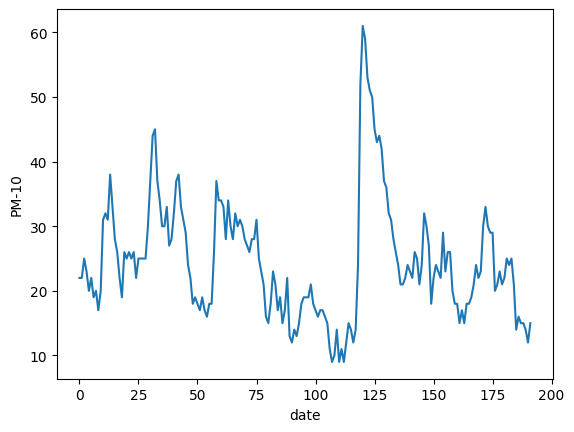

In [124]:
plt.plot(range(len(data['date'])), data['PM-10'])
plt.xlabel('date')
plt.ylabel('PM-10')
plt.show()

(2) 시간대별 평균 미세먼지 농도를 계산하세요. 즉, t(t=1, 2, 3..., 24)시의 평균 농도를 구하시오.

In [125]:
data['time'] = data['date'].str.slice(-2)
data.groupby('time')['PM-10'].mean()

time
01    25.875
02    22.000
03    21.000
04    21.000
05    21.375
06    21.375
07    20.250
08    22.375
09    23.125
10    22.750
11    27.000
12    25.125
13    25.250
14    28.000
15    24.500
16    24.500
17    26.500
18    25.500
19    25.125
20    27.000
21    28.125
22    28.125
23    27.250
24    26.625
Name: PM-10, dtype: float64

In [126]:
data

,date,PM-10,time
0,2022-12-08:24,22.0,24
1,2022-12-08:23,22.0,23
2,2022-12-08:22,25.0,22
3,2022-12-08:21,23.0,21
4,2022-12-08:20,20.0,20
...,...,...,...
190,2022-12-01:02,12.0,02
191,2022-12-01:01,15.0,01
192,NaN,NaN,NaN
193,NaN,NaN,NaN


(3) 시점 t의 미세먼지 농도를 시점 t-1, t-2, t-3, t-4의 농도를 이용하여 예측하는 모델을 학습하기 위한 데이터를 구성하세요

In [127]:
data['1'] = data['time'].shift(-1)
data['2'] = data['time'].shift(-2)
data['3'] = data['time'].shift(-3)
data['4'] = data['time'].shift(-4)
data

,date,PM-10,time,1,2,3,4
0,2022-12-08:24,22.0,24,23,22,21,20
1,2022-12-08:23,22.0,23,22,21,20,19
2,2022-12-08:22,25.0,22,21,20,19,18
3,2022-12-08:21,23.0,21,20,19,18,17
4,2022-12-08:20,20.0,20,19,18,17,16
...,...,...,...,...,...,...,...
190,2022-12-01:02,12.0,02,01,NaN,NaN,NaN
191,2022-12-01:01,15.0,01,NaN,NaN,NaN,NaN
192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
data = data.dropna()
y = data['PM-10']
data = data.drop(columns=['date', 'PM-10', 'time'])

In [129]:
data

,1,2,3,4
0,23,22,21,20
1,22,21,20,19
2,21,20,19,18
3,20,19,18,17
4,19,18,17,16
...,...,...,...,...
183,08,07,06,05
184,07,06,05,04
185,06,05,04,03
186,05,04,03,02


In [130]:
data['1'] = data['1'].astype('int')
data['2'] = data['2'].astype('int')
data['3'] = data['3'].astype('int')
data['4'] = data['4'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, 0 to 187
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       188 non-null    int32
 1   2       188 non-null    int32
 2   3       188 non-null    int32
 3   4       188 non-null    int32
dtypes: int32(4)
memory usage: 4.4 KB


In [131]:
from sklearn.preprocessing import StandardScaler
x = data
sc = StandardScaler()
sc.fit(x)
x = sc.transform(x)

In [135]:
y

0      22.0
1      22.0
2      25.0
3      23.0
4      20.0
       ... 
183    25.0
184    21.0
185    14.0
186    16.0
187    15.0
Name: PM-10, Length: 188, dtype: float64

In [133]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.1, random_state=42)

In [136]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [137]:
from sklearn.metrics import mean_squared_error
y_pred = lr.predict(x_val)
mse = mean_squared_error(y_pred, y_val)
print(mse)

91.35562575208128
